In [1]:
!pip install tensorflow==2.12.0 tensorflow-gpu==2.12.0 opencv-python matplotlib

  Using cached tensorflow-2.12.0-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


Requested tensorflow-gpu==2.12.0 from https://files.pythonhosted.org/packages/8a/45/fa31ced1db38f9424f262dfbf35747fe5378b5c808cecb373c8cb8e515d3/tensorflow-gpu-2.12.0.tar.gz has invalid metadata: Expected end or semicolon (after name and no valid version specifier)
    python_version>"3.7"
                  ^
Please use pip<24.1 if you need to use this version.
ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.12.0 (from versions: 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.12.0

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\Manya Aggarwal\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
import random

In [5]:
import tensorflow as tf

In [61]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

In [30]:
type(x_train)

numpy.ndarray

In [31]:
x_train.shape

(60000, 28, 28)

In [35]:
print(x_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [62]:
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0

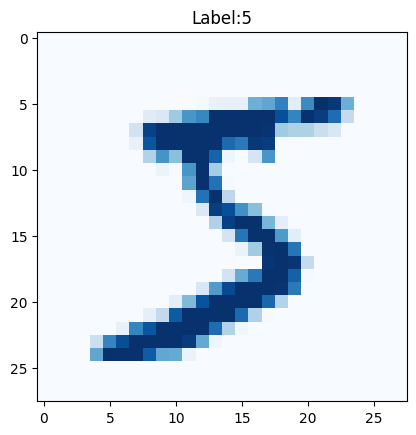

In [42]:
plt.imshow(x_train[0],cmap="Blues")
plt.title(f'Label:{y_train[0]}')
plt.show()

In [34]:
print(y_train)

[5 0 4 ... 5 6 8]


In [45]:
print(x_train[0][7][13])

0.99215686


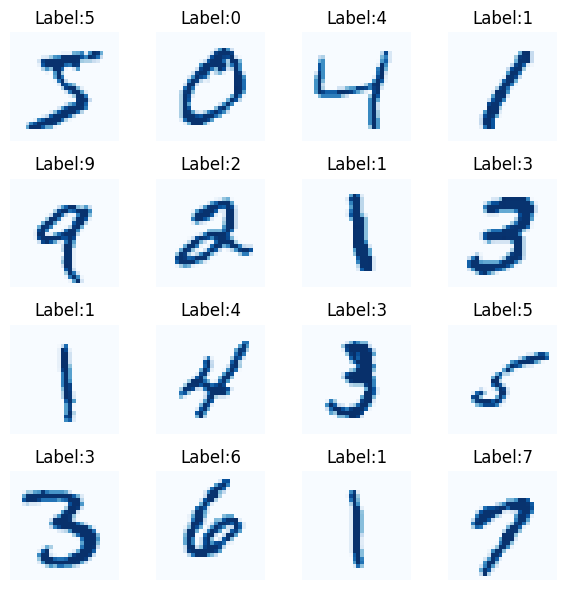

In [46]:
plt.figure(figsize=(6,6))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train[i],cmap="Blues")
    plt.title(f'Label:{y_train[i]}')
    plt.axis('off')
plt.tight_layout()    
plt.show()

In [65]:
#reshape the dataset for input in the dense layer of ANN
x_train=x_train.reshape(x_train.shape[0],-1)
x_test=x_test.reshape(x_test.shape[0],-1)

#one hot encoding of labels 
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

In [66]:
y_test.shape

(10000, 10)

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [53]:
def build_and_compile_model(activation_func,loss_func):
    model= Sequential([
        Flatten(input_shape=(784,)),
        Dense(128,activation=activation_func),
        Dense(64,activation=activation_func),
        Dense(10,activation='softmax')
    ])
    model.compile(optimizer='adam',
              loss=loss_func,
               metrics=['accuracy'] )
    return(model)    

In [67]:
activations=['relu','tanh','sigmoid']
losses=['categorical_crossentropy','mean_squared_error']
results=[]
for activation in activations:
    for loss in losses:
        print(f"activation function used:{activation},Loss function used:{loss}")
        model=build_and_compile_model(activation_func=activation,loss_func=loss)
        history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test),verbose=0)
        _,accuracy=model.evaluate(x_test,y_test,verbose=0)
        results.append({'Activation':activation,'Loss':loss,'Accuracy':accuracy})
        print(f"Test_accuracy:{accuracy:.4f}")

activation function used:relu,Loss function used:categorical_crossentropy


C:\Users\Manya Aggarwal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test_accuracy:0.9775
activation function used:relu,Loss function used:mean_squared_error
Test_accuracy:0.9772
activation function used:tanh,Loss function used:categorical_crossentropy
Test_accuracy:0.9772
activation function used:tanh,Loss function used:mean_squared_error
Test_accuracy:0.9775
activation function used:sigmoid,Loss function used:categorical_crossentropy
Test_accuracy:0.9774
activation function used:sigmoid,Loss function used:mean_squared_error
Test_accuracy:0.9756


In [60]:
y_train.shape

(60000, 10)

In [68]:
for result in results:
    print(f"Activation: {result['Activation']}, Loss: {result['Loss']}, Accuracy: {result['Accuracy']:.4f}")


Activation: relu, Loss: categorical_crossentropy, Accuracy: 0.9775
Activation: relu, Loss: mean_squared_error, Accuracy: 0.9772
Activation: tanh, Loss: categorical_crossentropy, Accuracy: 0.9772
Activation: tanh, Loss: mean_squared_error, Accuracy: 0.9775
Activation: sigmoid, Loss: categorical_crossentropy, Accuracy: 0.9774
Activation: sigmoid, Loss: mean_squared_error, Accuracy: 0.9756


same activation function and loss function but different layers and neurons in ANN

activation function=Relu

loss_function=categorical_cross_entropy

In [78]:
def build_and_compile_model(neuron_1,neuron_2):
    model= Sequential([
        Flatten(input_shape=(784,)),
        Dense(neuron_1,activation='relu'),
        Dense(neuron_2,activation='relu'),
        Dense(10,activation='softmax')
    ])
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
               metrics=['accuracy'] )
    return(model)   

In [79]:
neurons=[10,30,50,75]
results=[]
for neuron in neurons:
        print(f"neuron in first layer:{neuron},neuron in second layer:{neuron}")
        model=build_and_compile_model(neuron_1=neuron,neuron_2=neuron)
        history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test),verbose=0)
        _,accuracy=model.evaluate(x_test,y_test,verbose=0)
        results.append({'neurons_in_two_layers':neuron,'Accuracy':accuracy})
        print(f"Test_accuracy:{accuracy:.4f}")

neuron in first layer:10,neuron in second layer:10
Test_accuracy:0.9415
neuron in first layer:30,neuron in second layer:30
Test_accuracy:0.9636
neuron in first layer:50,neuron in second layer:50
Test_accuracy:0.9722
neuron in first layer:75,neuron in second layer:75
Test_accuracy:0.9735
